Mounting drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [7]:
import pathlib
dataset_url = '/content/drive/MyDrive/Colab Notebooks/dataset/'
data_dir = pathlib.Path(dataset_url)

In [8]:
image_count = len(list(data_dir.glob('**/*.jpg')))
print(image_count)

101


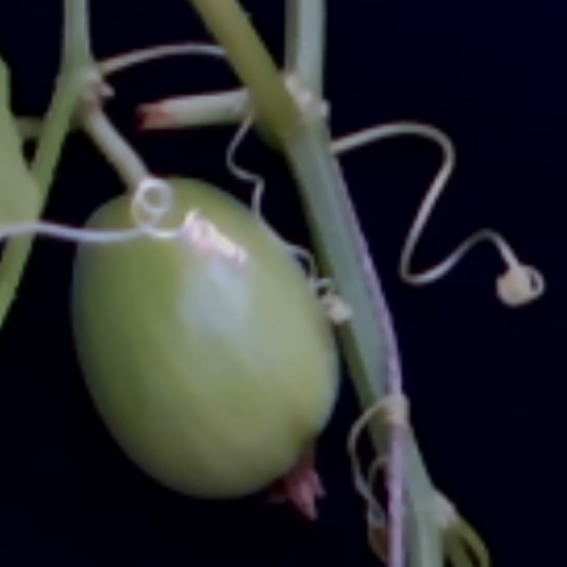

In [9]:
buah = list(data_dir.glob('**/buah/*'))
PIL.Image.open(str(buah[0]))

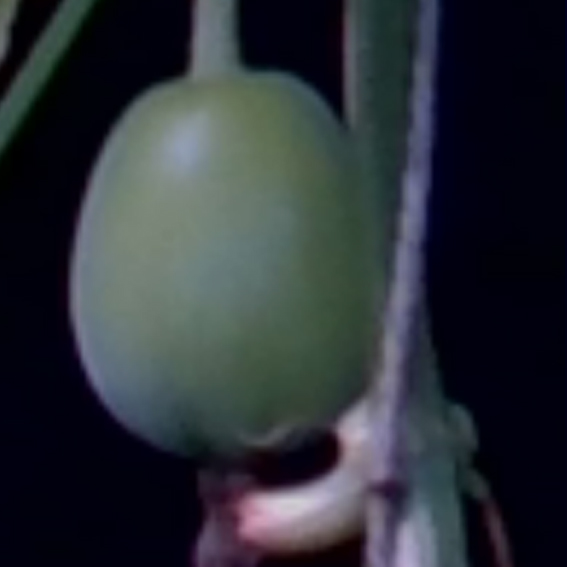

In [10]:
PIL.Image.open(str(buah[1]))

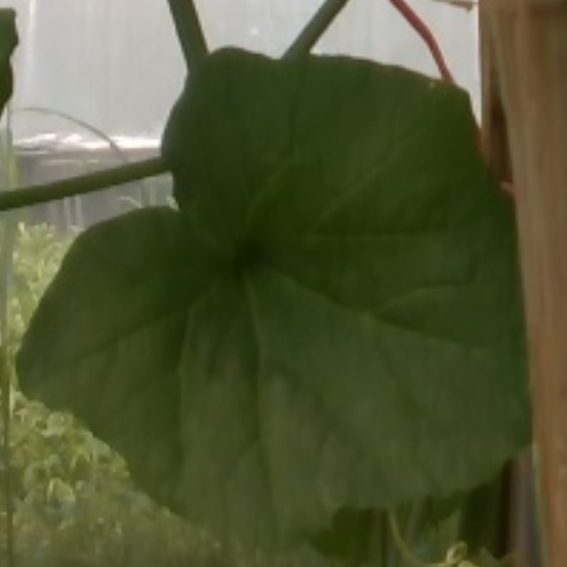

In [11]:
daun = list(data_dir.glob('**/daun/*'))
PIL.Image.open(str(daun[0]))

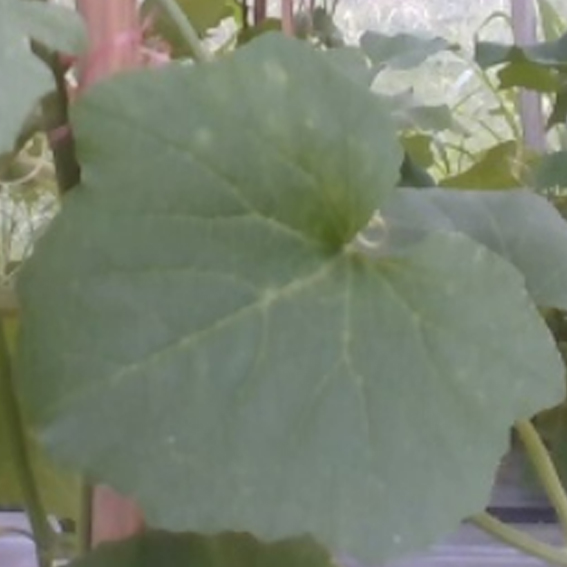

In [12]:
PIL.Image.open(str(daun[1]))

In [13]:
batch_size = 32
img_height = 180
img_width = 180

In [14]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 101 files belonging to 3 classes.
Using 81 files for training.


In [15]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 101 files belonging to 3 classes.
Using 20 files for validation.


In [16]:
class_names = train_ds.class_names
print(class_names)

['buah', 'daun', 'testing']


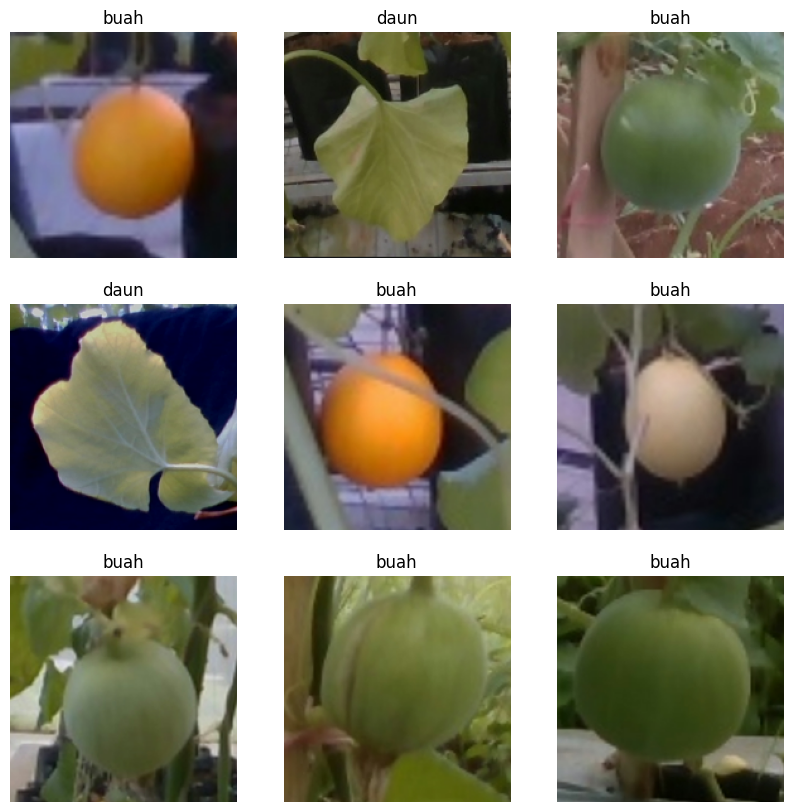

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [19]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [20]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [21]:
normalization_layer = layers.Rescaling(1./255)

In [22]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.8547599


In [23]:
num_classes = len(class_names)
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [24]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [26]:
epochs=180
history = model.fit(
train_ds,
validation_data=val_ds,
epochs=epochs
)

Epoch 1/180
3/3 [==============================] - 10s 3s/step - loss: 1.1035 - accuracy: 0.5185 - val_loss: 0.6255 - val_accuracy: 0.6500
Epoch 2/180
3/3 [==============================] - 3s 1s/step - loss: 0.8423 - accuracy: 0.4691 - val_loss: 0.8067 - val_accuracy: 0.3500
Epoch 3/180
3/3 [==============================] - 5s 2s/step - loss: 0.7487 - accuracy: 0.5926 - val_loss: 0.7424 - val_accuracy: 0.5500
Epoch 4/180
3/3 [==============================] - 3s 935ms/step - loss: 0.6632 - accuracy: 0.7778 - val_loss: 0.5086 - val_accuracy: 0.8000
Epoch 5/180
3/3 [==============================] - 3s 961ms/step - loss: 0.5411 - accuracy: 0.8765 - val_loss: 0.4208 - val_accuracy: 0.8000
Epoch 6/180
3/3 [==============================] - 5s 2s/step - loss: 0.4495 - accuracy: 0.8889 - val_loss: 0.3666 - val_accuracy: 0.8500
Epoch 7/180
3/3 [==============================] - 4s 1s/step - loss: 0.3994 - accuracy: 0.9012 - val_loss: 0.4395 - val_accuracy: 0.7000
Epoch 8/180
3/3 [==========

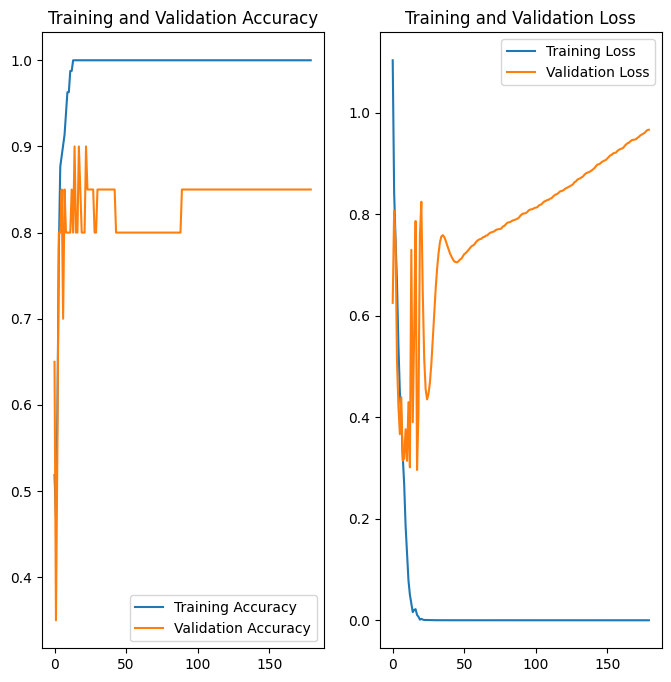

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [29]:
sunflower_path = '/content/drive/MyDrive/Colab Notebooks/dataset/testing/bd_1.jpg'

img = tf.keras.utils.load_img(sunflower_path, target_size=(img_height, img_width))

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
  "This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 168ms/step
This image most likely belongs to testing with a 99.99 percent confidence.
